# Practicing Logistic Regression on the Titanic Dataset.
# Goal: build a logistic regression model to predict survival on the Titanic.
# Data Dictionary:
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Let's read and peek at a sample of the data.

In [2]:
df = pd.read_csv('Titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# We need to decide what to do with these null values.

# First let's look at Age.

In [6]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' 
      %((df['Age'].isnull().sum()/df.shape[0])*100))

Percent of missing "Age" records is 19.87%


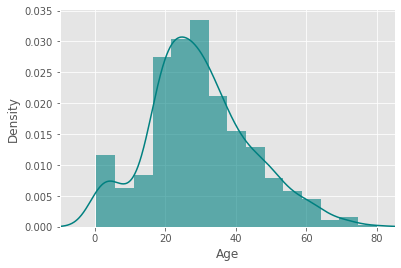

In [7]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [8]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


# There isn't much difference between mean and median...

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Now let's look at Cabin.

In [10]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' 
      %((df['Cabin'].isnull().sum()/df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


# 77.1% is really high, so we won't use that feature for prediction.

In [11]:
df.drop(columns = ['Cabin'], inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Let's check embarked.

In [12]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' 
      %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown,S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


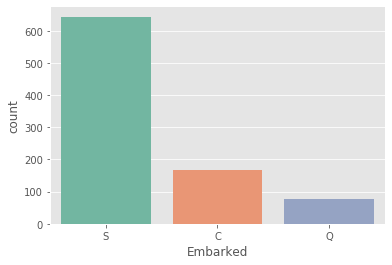

In [13]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown,S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

# There are only two records missing, 0.22% of the data, so let's just drop those two rows.

In [14]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [15]:
df.drop([61], inplace=True)
df.drop([829], inplace=True)
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Looks good! All null values are dropped or imputed. What kind of data do we have?

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Describe the numeric data (all except Name, Sex, Ticket, and Embarked).

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Let's break the data into test and train datasets before we explore further.

In [20]:
x = df.drop(columns='Survived')
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print('x_train shape:', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape', y_test.shape)
print('percent in x_train:', x_train.shape[0]/(x_train.shape[0] + x_test.shape[0]))
print('percent in x_test:', x_test.shape[0]/(x_train.shape[0] + x_test.shape[0]))

x_train shape: (711, 10)
y_train shape (711,)
x_test shape: (178, 10)
y_test shape (178,)
percent in x_train: 0.7997750281214848
percent in x_test: 0.20022497187851518


In [21]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
77,78,3,"Moutal, Mr. Rahamin Haim",male,28.0,0,0,374746,8.0500,S
353,354,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,S
788,789,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S
87,88,3,"Slocovski, Mr. Selman Francis",male,28.0,0,0,SOTON/OQ 392086,8.0500,S
373,374,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C


In [22]:
x_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,447.388186,2.319269,28.912911,0.511955,0.395218,31.745733
std,258.424410,0.829497,12.831651,1.059929,0.820463,49.789254
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,227.500000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
x_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

# Join the x_train and y_train to explore the data by survival.

In [24]:
train = x_train.join(y_train, how='outer')
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
77,78,3,"Moutal, Mr. Rahamin Haim",male,28.0,0,0,374746,8.0500,S,0
353,354,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,S,0
788,789,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,S,1
87,88,3,"Slocovski, Mr. Selman Francis",male,28.0,0,0,SOTON/OQ 392086,8.0500,S,0
373,374,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C,0


# How does SEX affect survival?

        Died  Survived  total
male     369        87    456
female    68       187    255


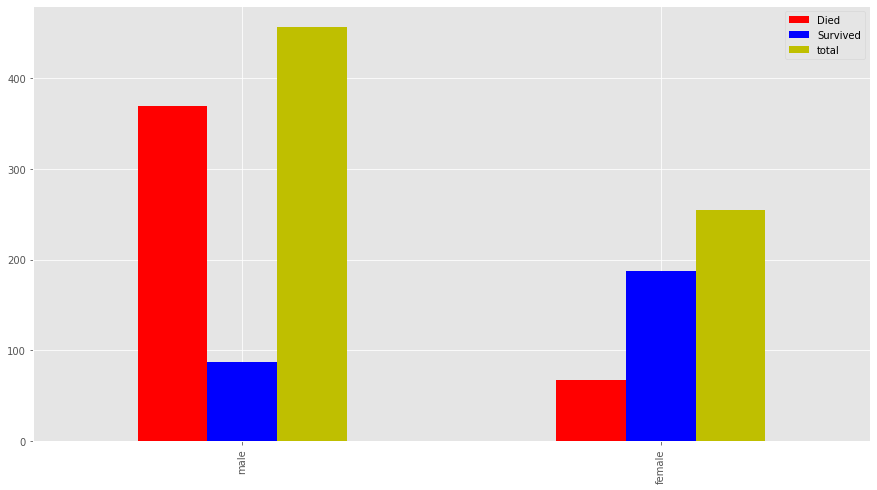

In [25]:
survived_male = train[train['Sex']=='male']['Survived'].value_counts()
survived_female = train[train['Sex']=='female']['Survived'].value_counts()
survived_sex_df = pd.DataFrame([survived_male, survived_female])
# Note: column 0 = died, column 1 = survived
survived_sex_df['total'] = survived_sex_df[0] + survived_sex_df[1]
survived_sex_df.index = ['male','female']
survived_sex_df.rename(index=str,columns={1:'Survived',0:'Died'}, inplace=True)
print (survived_sex_df)
survived_sex_df.plot(kind='bar',label=['Survived','Died'], figsize=(15,8), color = ['r','b','y'])

# How does AGE impact survival?
## Use a histogram in order to bin the ages.

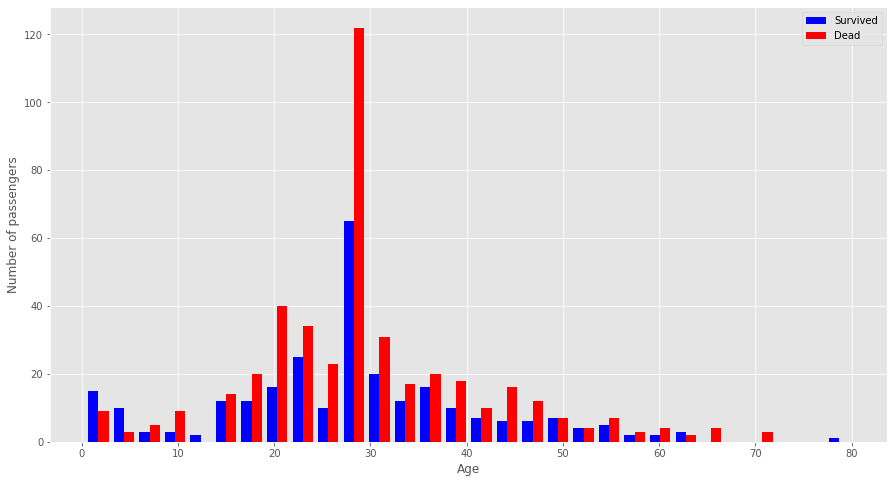

In [26]:
total_age = train['Age'].value_counts()
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], 
          train[train['Survived']==0]['Age']], color = ['b','r'],
          bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

# Let's decrease the number of bins on Age.

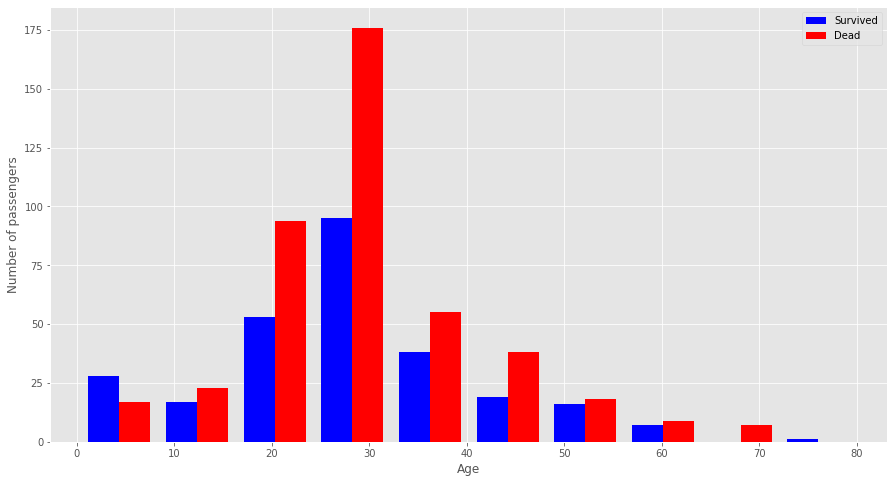

In [27]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'],
          train[train['Survived']==0]['Age']], color = ['b','r'],
          bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

# How does FARE impact survival?
## Again using a histogram to bin the fares.

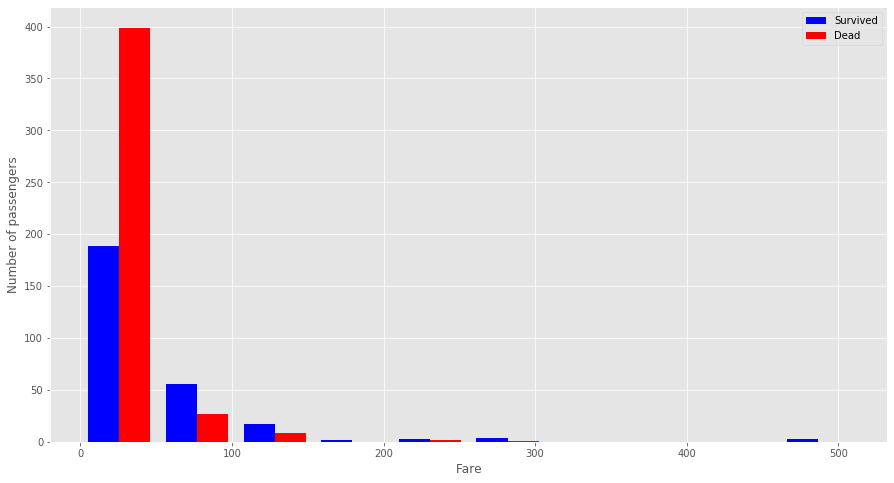

In [28]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'], 
          train[train['Survived']==0]['Fare']], color = ['b','r'],
          bins = 10,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

# How does CLASS affect survival?

           Died  Survived  total
1st class    60       107    167
2nd class    81        69    150
3rd class   296        98    394


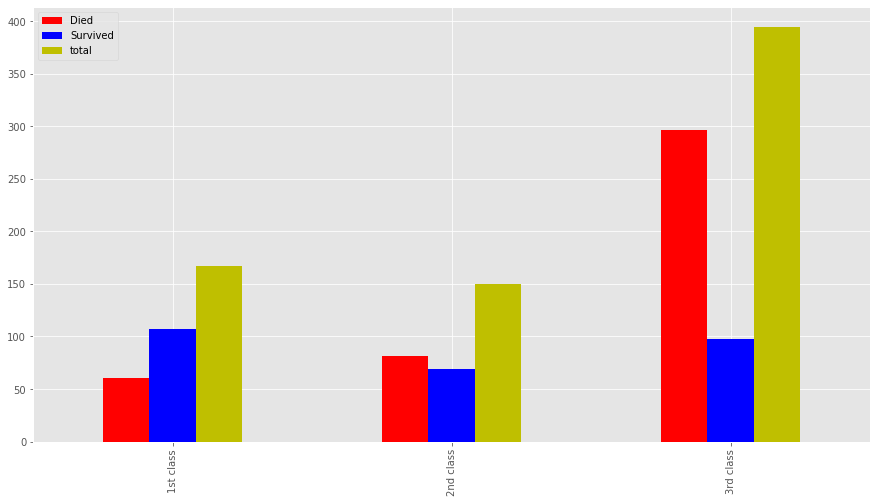

In [29]:
survived_1 = train[train['Pclass']==1]['Survived'].value_counts()
survived_2 = train[train['Pclass']==2]['Survived'].value_counts()
survived_3 = train[train['Pclass']==3]['Survived'].value_counts()
survived_df = pd.DataFrame([survived_1,survived_2,survived_3])
# Note: column 0 = died, column 1 = survived
survived_df['total']=survived_df[0] + survived_df[1]
survived_df.index = ['1st class','2nd class','3rd class']
survived_df.rename(index=str,columns={1:'Survived',0:'Died'}, inplace=True)
print (survived_df)
survived_df.plot(kind='bar',label=['Survived','Died'], figsize=(15,8), color = ['r','b','y'])

# Does their point of EMBARKMENT impact survival?

             Died  Survived  total
Southampton   337       174    511
Cherbourg      61        75    136
Queenstown     39        25     64


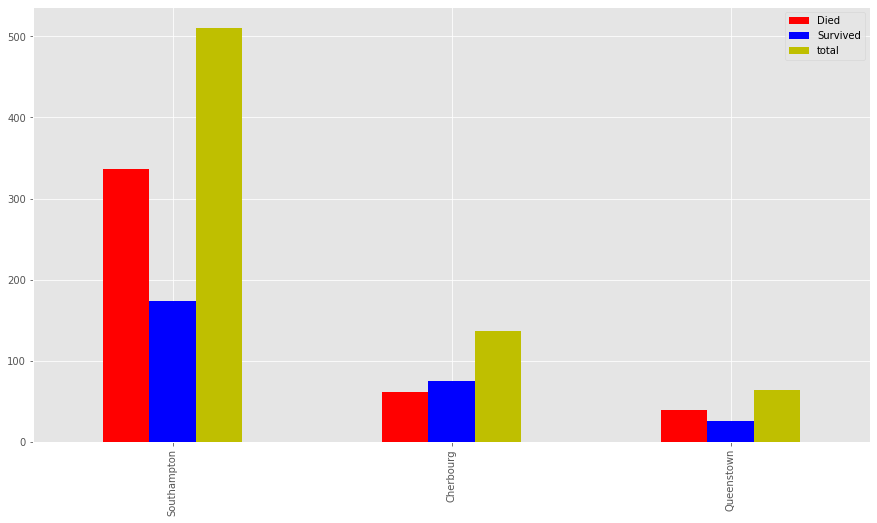

In [30]:
survived_by_embark1 = train[train['Embarked']=='S']['Survived'].value_counts()
survived_by_embark2 = train[train['Embarked']=='C']['Survived'].value_counts()
survived_by_embark3 = train[train['Embarked']=='Q']['Survived'].value_counts()
survived_by_embark_df = pd.DataFrame([survived_by_embark1,survived_by_embark2,survived_by_embark3])
# Note: column 0 = died, column 1 = survived
survived_by_embark_df['total']=survived_by_embark_df[0] + survived_by_embark_df[1]
survived_by_embark_df.index = ['Southampton','Cherbourg','Queenstown']
survived_by_embark_df.rename(index=str,columns={1:'Survived',0:'Died'}, inplace=True)
print (survived_by_embark_df)
survived_by_embark_df.plot(kind='bar',label=['Survived','Died'], figsize=(15,8), color = ['r','b','y'])

# Does the number of siblings/spouses on board impact their survival?

In [31]:
train.SibSp.max()

8

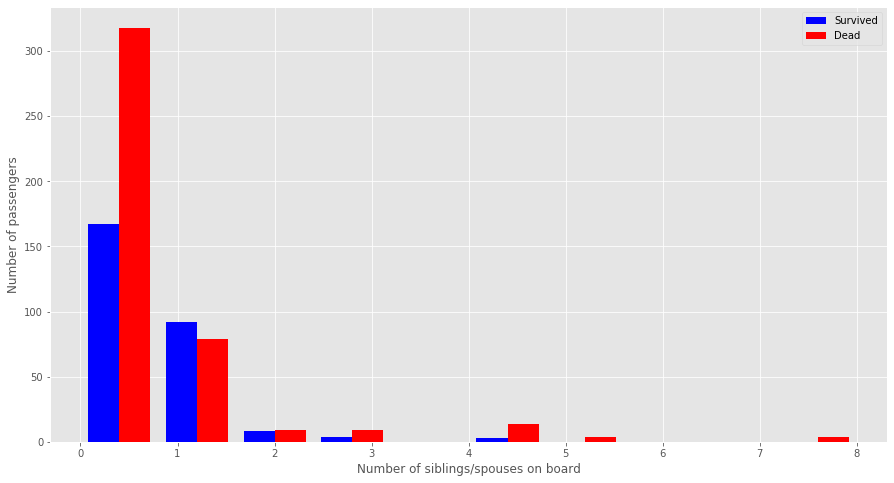

In [32]:
total_sibsp = train['SibSp'].value_counts()
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['SibSp'], 
          train[train['Survived']==0]['SibSp']], color = ['b','r'],
          label = ['Survived','Dead'])
plt.xlabel('Number of siblings/spouses on board')
plt.ylabel('Number of passengers')
plt.legend()

# Does the number of parents/children on board impact their survival?

In [33]:
train.Parch.max()

6

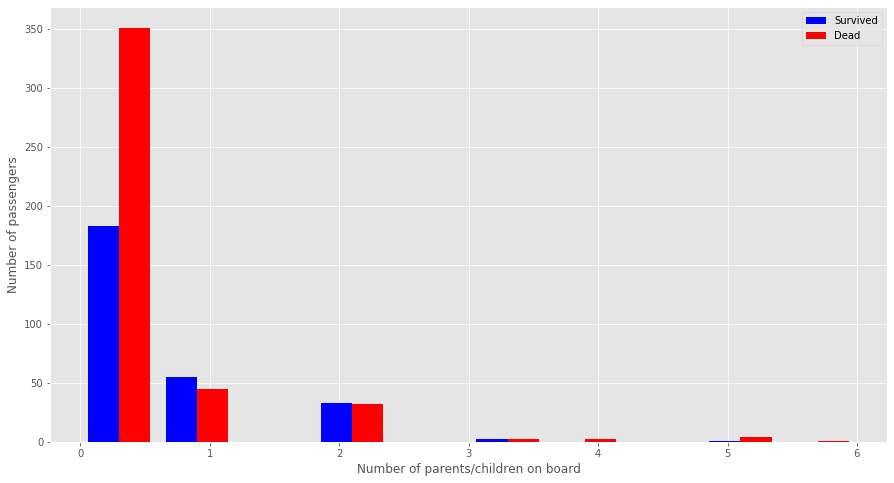

In [34]:
total_parch = train['Parch'].value_counts()
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Parch'], 
          train[train['Survived']==0]['Parch']], color = ['b','r'],
          label = ['Survived','Dead'])
plt.xlabel('Number of parents/children on board')
plt.ylabel('Number of passengers')
plt.legend()

# Let's try a scatterplot on AGE against FARE.

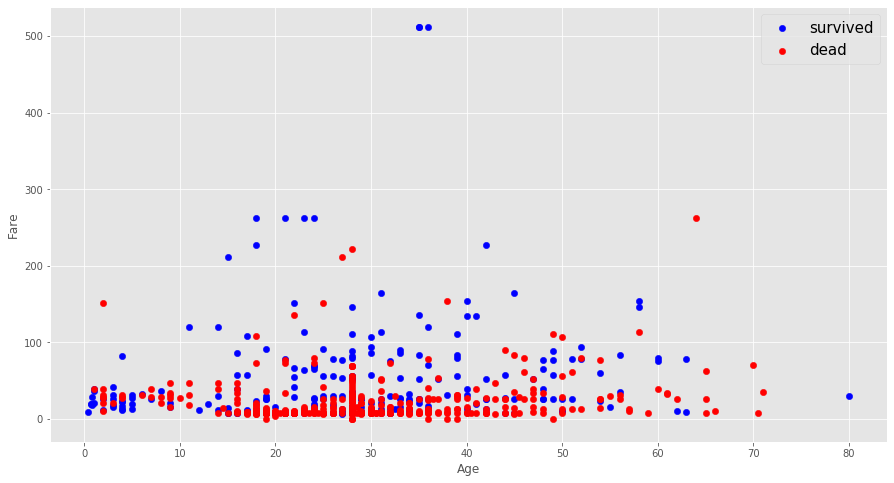

In [35]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'], 
           train[train['Survived']==1]['Fare'],
           c='blue',s=40)
ax.scatter(train[train['Survived']==0]['Age'], 
           train[train['Survived']==0]['Fare'], 
           c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

# Let's encode the data to do logistic regression.

In [36]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [37]:
cat_df = train[['Pclass','Sex','Age','Fare','SibSp','Parch']]
one_hot_encoded_training_predictors = pd.get_dummies(cat_df)
one_hot_encoded_training_predictors.head()

,Pclass,Age,Fare,SibSp,Parch,Sex_female,Sex_male
77,3,28.0,8.0500,0,0,0,1
353,3,25.0,17.8000,1,0,0,1
788,3,1.0,20.5750,1,2,0,1
87,3,28.0,8.0500,0,0,0,1
373,1,22.0,135.6333,0,0,0,1


# And split the data into X and y.

In [38]:
X2 = one_hot_encoded_training_predictors
y2 = train['Survived']

In [39]:
X2.shape

(711, 7)

In [40]:
y2.shape

(711,)

In [41]:
#dividing the data in training and test data 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.65, random_state=1)

# Build the logistic regression model.

In [42]:
logreg = LogisticRegression(solver='lbfgs',
...                         multi_class='multinomial',
                            max_iter=1000) #logistic regression using python
logreg.fit(X2_train, y2_train), 

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='multinomial', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),)

In [43]:
y_pred = logreg.predict(X2_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X2_test, y2_test)))

Accuracy of logistic regression classifier on test set: 0.80


# Now test on real test data.

In [44]:
cat_test_df = x_test[['Pclass','Sex','Age','Fare','SibSp','Parch']]
one_hot_encoded_training_predictors = pd.get_dummies(cat_test_df)
one_hot_encoded_training_predictors.head()

,Pclass,Age,Fare,SibSp,Parch,Sex_female,Sex_male
518,2,36.0,26.0000,1,0,1,0
842,1,30.0,31.0000,0,0,1,0
751,3,6.0,12.4750,0,1,0,1
315,3,26.0,7.8542,0,0,1,0
550,1,17.0,110.8833,0,2,0,1


In [45]:
X1 = one_hot_encoded_training_predictors
y1 = y_test

In [46]:
X1.shape

(178, 7)

In [47]:
y1.shape

(178,)

In [48]:
y_pred = logreg.predict(X1) #predicting the values
print('Accuracy of logistic regression classifier on original test set: {:.2f}'.format(logreg.score(X1, y1)))

Accuracy of logistic regression classifier on original test set: 0.81
